# Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
CSV_FILE_PATH = "../data/preprocessed_data.csv"
MAX_RSSI = 0
MIN_RSSI = -99
DENOISE_SNR = 20 

### Data in file

In [3]:
df = pd.read_csv(CSV_FILE_PATH)
df.head()

,tag,x,y,z,timestamp,0,-1,-2,-3,-4,...,-90,-91,-92,-93,-94,-95,-96,-97,-98,-99
0,BP_WirelessTransmitter_C_UAID_3814280578B89E1D...,0.0,0.0,0.000000,1656943851933,0,0,0,0,0,...,298,298,319,333,317,349,335,353,358,363
1,BP_WirelessTransmitter_C_UAID_3814280578B8E71C...,1210.0,1150.0,162.012604,1656943852027,0,1,0,0,0,...,1531,1667,1843,2029,2216,2347,2408,2701,2947,3199
2,BP_WirelessTransmitter_C_UAID_3814280578B8B91A...,1210.0,1150.0,162.012604,1656943852084,0,0,0,0,0,...,1163,1331,1574,1728,1802,1919,2155,2476,2776,3116
3,Total,1210.0,1150.0,162.012604,1656943852133,2,0,0,0,0,...,1963,2097,2178,2390,2663,3060,3561,3989,4235,5014
4,BP_WirelessTransmitter_C_UAID_3814280578B89E1D...,1210.0,1150.0,162.012604,1656943852166,0,0,0,0,0,...,1518,1595,1822,1917,2164,2354,2496,2837,3218,3520


### The unique scanning tag

In [4]:
df.tag.unique()

array(['BP_WirelessTransmitter_C_UAID_3814280578B89E1D01_1324636591',
       'BP_WirelessTransmitter_C_UAID_3814280578B8E71C01_1259575383',
       'BP_WirelessTransmitter_C_UAID_3814280578B8B91A01_1331298178',
       'Total'], dtype=object)

### Get scanning result from one of tag

In [14]:
TX1_df = df[df.tag == 'BP_WirelessTransmitter_C_UAID_3814280578B89E1D01_1324636591'].reset_index(drop=True)
TX1_df.head()

,tag,x,y,z,timestamp,0,-1,-2,-3,-4,...,-90,-91,-92,-93,-94,-95,-96,-97,-98,-99
0,BP_WirelessTransmitter_C_UAID_3814280578B89E1D...,0.0,0.0,0.000000,1656943851933,0,0,0,0,0,...,298,298,319,333,317,349,335,353,358,363
1,BP_WirelessTransmitter_C_UAID_3814280578B89E1D...,1210.0,1150.0,162.012604,1656943852166,0,0,0,0,0,...,1518,1595,1822,1917,2164,2354,2496,2837,3218,3520
2,BP_WirelessTransmitter_C_UAID_3814280578B89E1D...,1210.0,1150.0,162.012604,1656943852303,0,0,0,0,0,...,1501,1644,1816,1970,2202,2317,2491,2851,3191,3480
3,BP_WirelessTransmitter_C_UAID_3814280578B89E1D...,1210.0,1150.0,162.012604,1656943852439,0,0,0,0,0,...,1522,1643,1822,1984,2145,2386,2572,2819,3157,3529
4,BP_WirelessTransmitter_C_UAID_3814280578B89E1D...,1210.0,1150.0,162.012604,1656943852579,0,0,0,0,0,...,1538,1599,1815,1964,2140,2381,2520,2830,3184,3539


In [15]:
TX1_pdft = TX1_df[[f'{x}' for x in range(MAX_RSSI,MIN_RSSI - 1,-1)]].to_numpy()

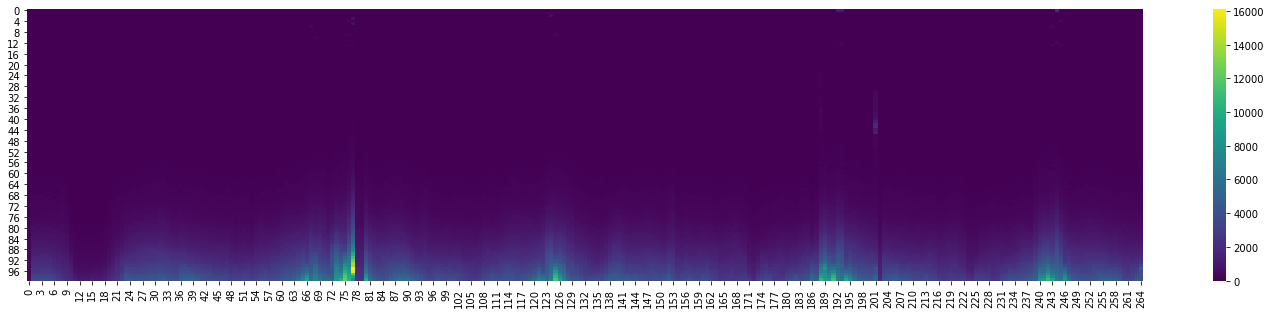

In [16]:
plt.figure(figsize=(25,5))
ax = sns.heatmap(TX1_pdft.transpose(1,0),cmap="viridis")
plt.show()

### Normalize the probability distribution function

In [17]:
TX1_pdft_norm = TX1_pdft.copy().astype('float')
for i in range(len(TX1_pdft_norm)):
    # print(TX1_pdft_norm[i] / max(TX1_pdft_norm[i].sum(), 0.001))
    TX1_pdft_norm[i] = TX1_pdft_norm[i] / max(TX1_pdft_norm[i].sum(), 1)

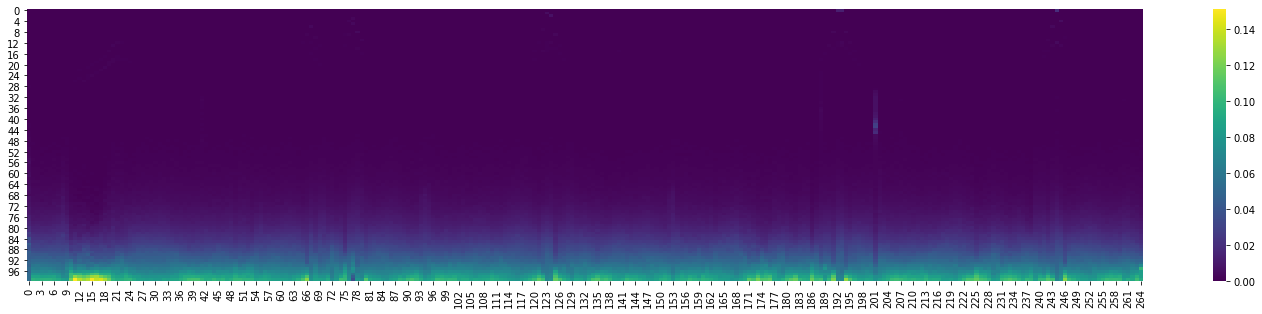

In [18]:
plt.figure(figsize=(25,5))
ax = sns.heatmap(TX1_pdft_norm.transpose(1,0),cmap="viridis")
plt.show()

### Background Denoising

In [19]:
TX1_pdft_denoise = TX1_pdft.copy().astype('float')

rows = len(TX1_pdft_denoise)
cols = len(TX1_pdft_denoise[0])
for i in range(rows):
    for j in range(cols):
        item = TX1_pdft_denoise[i][j]
        if item > 0:
            TX1_pdft_denoise[i][min(j+DENOISE_SNR, cols):] = 0
TX1_pdft_denoise

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

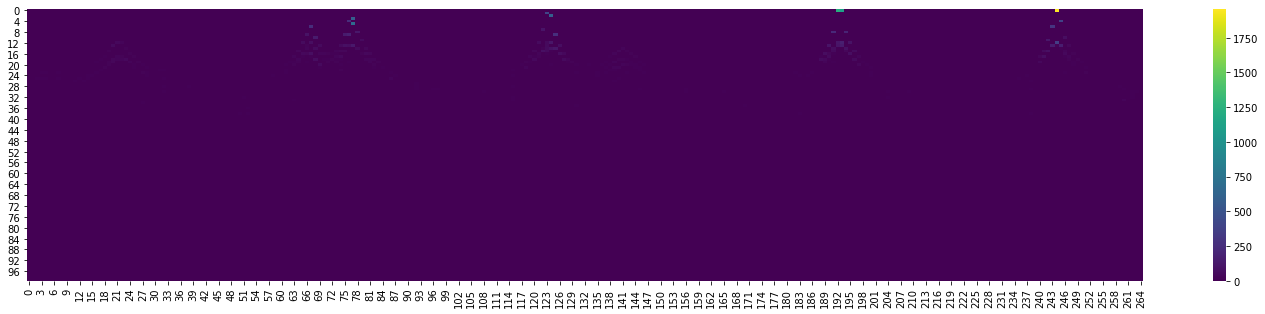

In [20]:
plt.figure(figsize=(25,5))
ax = sns.heatmap(TX1_pdft_denoise.transpose(1,0),cmap="viridis")
plt.show()

In [21]:
TX1_pdft_denoise_norm = TX1_pdft_denoise.copy().astype('float')
for i in range(len(TX1_pdft_denoise_norm)):
    # print(TX1_pdft_norm[i] / max(TX1_pdft_norm[i].sum(), 0.001))
    TX1_pdft_denoise_norm[i] = TX1_pdft_denoise_norm[i] / max(TX1_pdft_denoise_norm[i].sum(), 1)

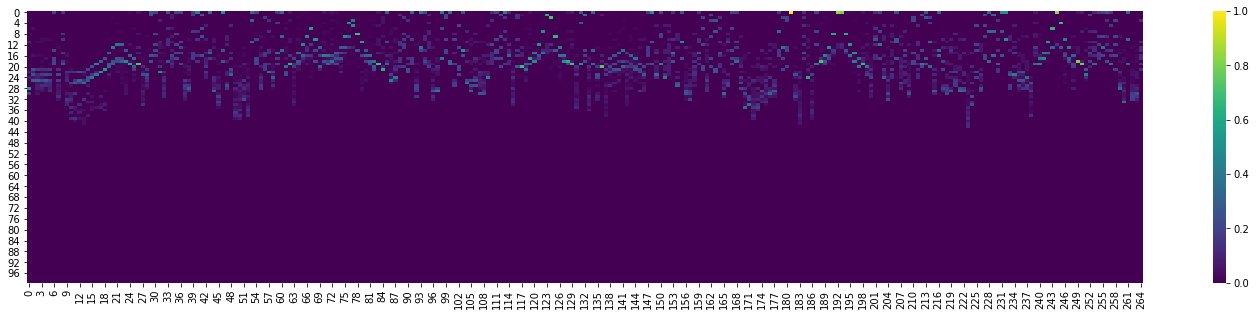

In [24]:
plt.figure(figsize=(25,5))
ax = sns.heatmap(TX1_pdft_denoise_norm.transpose(1,0),cmap="viridis")
plt.show()